# Tutorial on Traffic Signal

This tutorial explains how to define and configure traffic signals in UXsim.


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Basic definition

In UXsim, a node can have its traffic signal. A traffic signal determine which link can send vehicles to the node.
To define a signal of a node, you need to set `signal` parameter of `Node` and `signal_group` parameter of `Link`s that are connected to the node.

The following code shows a simple example of traffic signal definition.

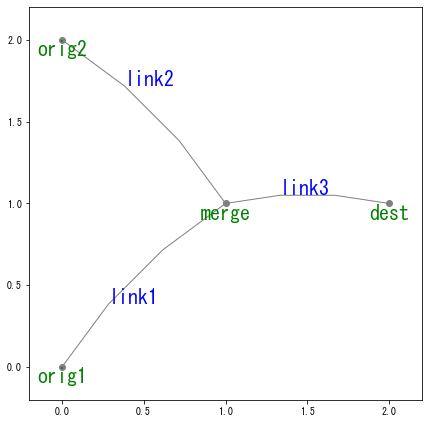

In [2]:
from uxsim import *

# simulation world
W = World(
    name="",
    deltan=1,
    tmax=1200,
    print_mode=1, save_mode=1, show_mode=1,
    random_seed=0
)

# scenario
#merge network with signal
W.addNode("orig1", 0, 0)
W.addNode("orig2", 0, 2)
W.addNode("merge", 1, 1, signal=[30, 60]) #`signal` is a list of [duration of phase 0, duration of phase 1, ...]
W.addNode("dest", 2, 1)
W.addLink("link1", "orig1", "merge", length=1000, signal_group=0) #if `signal_group` is 0, the exit of this link will be green at phase 0
W.addLink("link2", "orig2", "merge", length=1000, signal_group=1)
W.addLink("link3", "merge", "dest", length=1000)

W.show_network(network_font_size=20, show_id=False)


`signal` parameter of `Node` (defined via `W.addNode()`) is a list of duration of signal phases. For example, `signal=[30, 60]` of "merge" node means that the signal of this node has 2 phases. And the duration of phase 0 is 30 seconds, and that of phase 1 is 60 seconds.

`signal_group` parameter of `Link` (defined via `W.addLink()`) specifies the group to which this link belongs. For example, `signal_group=0` of "link1" means that this link will have green light when the signal phase is 0. 

Thus, the above code means that the "merge" node has a traffic signal. The signal pattern is, "link1" will green light for 30 seconds at first. And then "link2" will have green light for 60 seconds. And this pattern is repeated forever.

Now we set a demand and execute the simulation as follows.

simulation setting:
 scenario name: 
 simulation duration:	 1200 s
 number of vehicles:	 499 veh
 total road length:	 3000 m
 time discret. width:	 1 s
 platoon size:		 1 veh
 number of timesteps:	 1200
 number of platoons:	 499
 number of links:	 3
 number of nodes:	 4
 setup time:		 0.31 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
     600 s|       90 vehs|  15.6 m/s|     0.41 s
    1200 s|        0 vehs|   0.0 m/s|     0.66 s
 simulation finished
results:
 average speed:	 14.5 m/s
 number of completed trips:	 499 / 499
 average travel time of trips:	 138.5 s
 average delay of trips:	 38.5 s
 delay ratio:			 0.278
 total distance traveled:	 998000.0 m
 drawing trajectories...


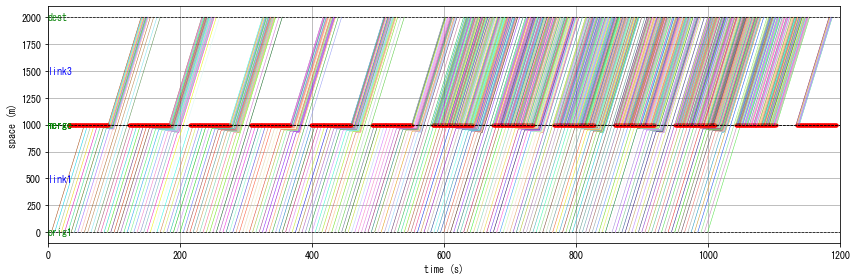

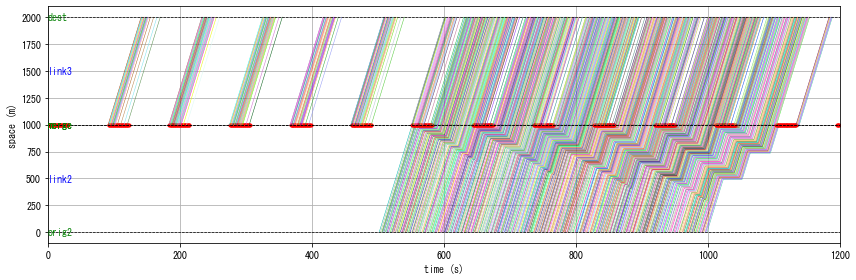

In [3]:
W.adddemand("orig1", "dest", 0, 1000, 0.2)
W.adddemand("orig2", "dest", 500, 1000, 0.6)

# execute simulation
W.exec_simulation()

# visualize
W.analyzer.print_simple_stats()
W.analyzer.time_space_diagram_traj_links([["link1", "link3"], ["link2", "link3"]])

In the vehicle trajectory diagram, red dots (looks like a bold horizontal line) at "merge" node position mean that the link has red light at the moment. You can see that vehicles followed the traffic signal and waiting queues were generated accordingly.

## 4-legged intersections

Here is a more realistic traffic signal example with standard, 4-legged intersections. We consider the following network with 4 intersections.

```
    N1  N2    
    |   |     
W1--I1--I2--E1
    |   |     
W2--I3--I4--E2
    |   |     
    S1  S2    
```

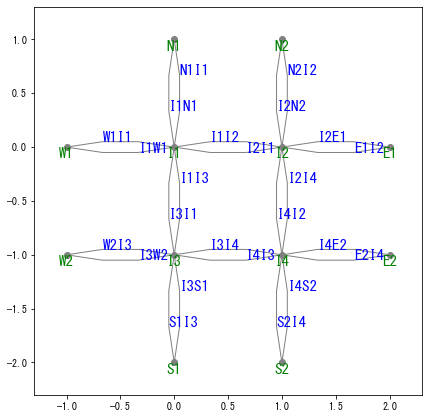

In [4]:
from uxsim import *
import random
import itertools

# world definition
seed = 0
W = World(
    name="",
    deltan=5,
    tmax=3600,
    print_mode=1, save_mode=0, show_mode=1,
    random_seed=seed,
    duo_update_time=99999
)

# network definition

I1 = W.addNode("I1", 0, 0, signal=[60,60])
I2 = W.addNode("I2", 1, 0, signal=[60,60])
I3 = W.addNode("I3", 0, -1, signal=[60,60])
I4 = W.addNode("I4", 1, -1, signal=[60,60])
W1 = W.addNode("W1", -1, 0)
W2 = W.addNode("W2", -1, -1)
E1 = W.addNode("E1", 2, 0)
E2 = W.addNode("E2", 2, -1)
N1 = W.addNode("N1", 0, 1)
N2 = W.addNode("N2", 1, 1)
S1 = W.addNode("S1", 0, -2)
S2 = W.addNode("S2", 1, -2)

#E <-> W direction: signal group 0
for n1,n2 in [[W1, I1], [I1, I2], [I2, E1], [W2, I3], [I3, I4], [I4, E2]]:
    W.addLink(n1.name+n2.name, n1, n2, length=500, signal_group=0)
    W.addLink(n2.name+n1.name, n2, n1, length=500, signal_group=0)
#N <-> S direction: signal group 1
for n1,n2 in [[N1, I1], [I1, I3], [I3, S1], [N2, I2], [I2, I4], [I4, S2]]:
    W.addLink(n1.name+n2.name, n1, n2, length=500, signal_group=1)
    W.addLink(n2.name+n1.name, n2, n1, length=500, signal_group=1)

W.show_network(network_font_size=15, show_id=False)


The intersection nodes I1, I2, I3, and I4 have 2 phases. 
During phase 0, links in east-west direction will have green light.
Note that the links are added programatically by using for-loop, as manually adding this number of links is a little bit tedious.

The simulation results with random demand is shown below. 

simulation setting:
 scenario name: 
 simulation duration:	 3600 s
 number of vehicles:	 4205 veh
 total road length:	 12000 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 720
 number of platoons:	 841
 number of links:	 24
 number of nodes:	 12
 setup time:		 0.50 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
     600 s|      145 vehs|  14.5 m/s|     0.19 s
    1200 s|      165 vehs|  11.8 m/s|     0.38 s
    1800 s|      155 vehs|   9.7 m/s|     0.57 s
    2400 s|      150 vehs|   7.3 m/s|     0.70 s
    3000 s|      130 vehs|  17.7 m/s|     0.84 s
    3600 s|      150 vehs|  13.3 m/s|     0.90 s
 simulation finished
results:
 average speed:	 11.7 m/s
 number of completed trips:	 4025 / 4205
 average travel time of trips:	 130.3 s
 average delay of trips:	 51.2 s
 delay ratio:			 0.393
 total distance traveled:	 6592625.0 m
 drawing trajectories...


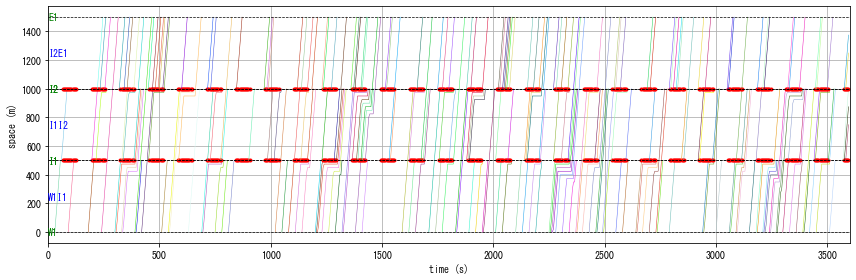

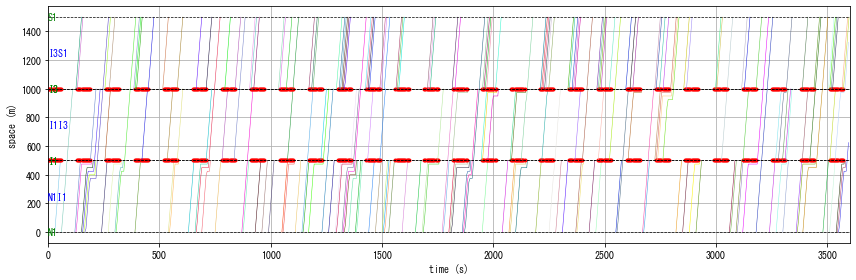

In [5]:
# random demand definition
dt = 30
demand = 0.19
for n1, n2 in itertools.permutations([W1, W2, E1, E2, N1, N2, S1, S2], 2):
    for t in range(0, 3600, dt):
        W.adddemand(n1, n2, t, t+dt, random.uniform(0, demand))

# simulation
W.exec_simulation()

# resutls
W.analyzer.print_simple_stats()
W.analyzer.time_space_diagram_traj_links([["W1I1", "I1I2", "I2E1"], ["N1I1", "I1I3", "I3S1"]])

## Adaptive traffic signal control

Adapting signal indications in response to real-time traffic conditions to achieve efficient traffic flow is an important issue. UXsim can handle this issue, by changing traffic signal phase during simulation depending on traffic states.

Let's use the same scenario to the 1st example.

In [6]:
from uxsim import *

# Definition of the main simulation
W = World(
    name="",
    deltan=1,
    tmax=1200,
    print_mode=1, save_mode=1, show_mode=1,
    random_seed=0
)

# Scenario definition
# Merging network: signal control
W.addNode("orig1", 0, 0)
W.addNode("orig2", 0, 2)
node_signal = W.addNode("merge", 1, 1, signal=[30,60]) # The variable 'signal' is a list of [duration of phase 0, duration of phase 1, ...]
W.addNode("dest", 2, 1)
W.addLink("link1", "orig1", "merge", length=1000, free_flow_speed=20, jam_density=0.2, merge_priority=1, signal_group=0) # The value of the variable 'signal_group' (say `n`) indicates that the exit of this link will turn green during phase 'n'
W.addLink("link2", "orig2", "merge", length=1000, free_flow_speed=20, jam_density=0.2, merge_priority=1, signal_group=1)
W.addLink("link3", "merge", "dest", length=1000, free_flow_speed=20, jam_density=0.2)
W.adddemand("orig1", "dest", 0, 1000, 0.2)
W.adddemand("orig2", "dest", 500, 1000, 0.6)

Now we code traffic signal control logic during the simulation as follows.

In [7]:
from uxsim import *

# Definition of the main simulation
W = World(
    name="",
    deltan=1,
    tmax=1200,
    print_mode=1, save_mode=1, show_mode=1,
    random_seed=0
)

# Scenario definition
# Merging network: signal control
W.addNode("orig1", 0, 0)
W.addNode("orig2", 0, 2)
node_signal = W.addNode("merge", 1, 1, signal=[30,60]) # The variable 'signal' is a list of [duration of phase 0, duration of phase 1, ...]
W.addNode("dest", 2, 1)
W.addLink("link1", "orig1", "merge", length=1000, free_flow_speed=20, jam_density=0.2, merge_priority=1, signal_group=0) # The value of the variable 'signal_group' (say `n`) indicates that the exit of this link will turn green during phase 'n'
W.addLink("link2", "orig2", "merge", length=1000, free_flow_speed=20, jam_density=0.2, merge_priority=1, signal_group=1)
W.addLink("link3", "merge", "dest", length=1000, free_flow_speed=20, jam_density=0.2)
W.adddemand("orig1", "dest", 0, 1000, 0.2)
W.adddemand("orig2", "dest", 500, 1000, 0.6)

# Run the simulation iteratively
while W.check_simulation_ongoing():
    # Execute the simulation in increments of 10 seconds
    W.exec_simulation(duration_t2=10)

    # Investigate the number of vehicles per link
    vehicles_per_links = {}
    for l in node_signal.inlinks.values():
        vehicles_per_links[tuple(l.signal_group)] = l.num_vehicles # l.num_vehicles: Number of vehicles on link 'l'
    max_vehicles_group = max(vehicles_per_links, key=vehicles_per_links.get) # Returns the link with the maximum number of vehicles
    
    if int(W.TIME)%100 == 0:
        #print logs. Sorry for the messy code. This code itself is not important, so no need to understand it
        print(f"t = {W.TIME} s;", "; ".join([f"phase {k[0]} - number of vehicle = {v:2d}" for k,v in vehicles_per_links.items()]), f"; green light - phase {max_vehicles_group[0]}")

    # Set the signal to green for the link with the maximum number of vehicles
    node_signal.signal_phase = max_vehicles_group[0]
    node_signal.signal_t = 0

simulation setting:
 scenario name: 
 simulation duration:	 1200 s
 number of vehicles:	 499 veh
 total road length:	 3000 m
 time discret. width:	 1 s
 platoon size:		 1 veh
 number of timesteps:	 1200
 number of platoons:	 499
 number of links:	 3
 number of nodes:	 4
 setup time:		 0.05 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
t = 100 s; phase 0 - number of vehicle = 10; phase 1 - number of vehicle =  0 ; green light - phase 0
t = 200 s; phase 0 - number of vehicle = 10; phase 1 - number of vehicle =  0 ; green light - phase 0
t = 300 s; phase 0 - number of vehicle = 10; phase 1 - number of vehicle =  0 ; green light - phase 0
t = 400 s; phase 0 - number of vehicle = 10; phase 1 - number of vehicle =  0 ; green light - phase 0
t = 500 s; phase 0 - number of vehicle = 10; phase 1 - number of vehicle =  0 ; green light - phase 0
t = 600 s; phase 0 - number of vehicle = 26; phase 1 - number of vehicle = 30 ;

In the above code, 
```
# Run the simulation iteratively
while W.check_simulation_ongoing():
    # Execute the simulation in increments of 10 seconds
    W.exec_simulation(duration_t2=10)

```
means that simulation is iteratively executed for 10 seconds. Thusm, users can write a code to interven the simulation. The while loop will automatically exit when the simulation is complete. 

This code identify which link has the largest number of vehicles. 
```
    # Investigate the number of vehicles per direction
    vehicles_per_links = {}
    for l in node_signal.inlinks.values():
        vehicles_per_links[tuple(l.signal_group)] = l.num_vehicles # l.num_vehicles: Number of vehicles on link 'l'
    max_vehicles_group = max(vehicles_per_links, key=vehicles_per_links.get) # Returns the direction with the maximum number of vehicles
```

And then, the following link change the signal. The signal phase is changed to give green light to the link with largest number of vehicles, and the time count is reset.
```
    # Set the signal to green for the link with the maximum number of vehicles
    node_signal.signal_phase = max_vehicles_group[0]
    node_signal.signal_t = 0
```

You can see how this code works in the above logs. For some time points, it shows number of vehicles for each phase and determines the phase.

The results are visualized as follows.
You can see that, before 500 seconds, "link1" always had green light, as no vehicles were comming from "link2". 
After 500 seconds, traffic started coming from "link2".
Then, traffic signal changed efficiently to keep the waiting queue minimum.
The efficiency can be confirmed by comparing to the results of the 1st example in this demo: The delay was smaller, thequeues were shorter, the flow during the green time was always saturated, and so on.

results:
 average speed:	 16.6 m/s
 number of completed trips:	 499 / 499
 average travel time of trips:	 120.5 s
 average delay of trips:	 20.5 s
 delay ratio:			 0.170
 total distance traveled:	 998000.0 m
 drawing trajectories...


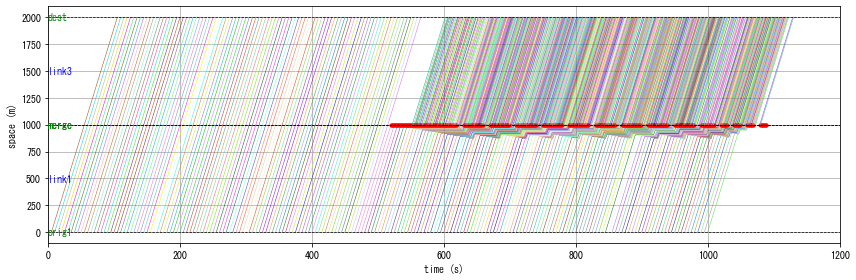

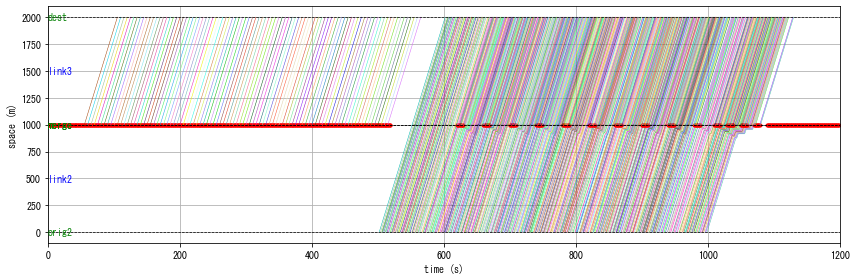

In [8]:
# visualize
W.analyzer.print_simple_stats()
W.analyzer.time_space_diagram_traj_links([["link1", "link3"], ["link2", "link3"]])

Furthremore, more advanced control method such as AI (more specifically, deep reinforcement learning) can be easily integrated with UXsim's traffic signal control. 
Please see [Jupyter notebook](https://github.com/toruseo/UXsim/blob/main/demos_and_examples/demo_notebook_03en_pytorch.ipynb) or [document](https://toruseo.jp/UXsim/docs/notebooks/demo_notebook_03en_pytorch.html).